# Imports And Variables

In [50]:
import json
import re
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [51]:
# URL regex pattern
urlPat = re.compile(r'((http://)|(https://))?(www.)?(([a-zA-Z0-9-]+)(\.[a-zA-Z])*(\.[a-zA-Z][a-zA-Z]([a-zA-Z])?))(?:/[^\s]*)?')
keys = ['input', 'input_en', 'output', 'output_ge', 'summary']
# Reads the data as pandas dataframe
with open('masked_data.csv', 'r', encoding='utf-8') as f:
    data = pd.read_csv(f)

# Statistic Functions

In [52]:
def stat_create(pat: re, keys: list, name: str):
  """ Calculates occurences of specific pattern in data's keys values """
  for key in keys:
    data[key+"_"+name] = data[key].str.count(pat)
    data[key+"_"+name].fillna(0)


In [53]:
def print_stat(label:str, name: str, keys: list):
    print(label)
    for key in keys:
        print(f"{key}: {data[key+'_'+name].sum()}")

In [54]:
def stat_dict(keys:list, name:str)-> dict:
    ans = {}
    for key in keys:
        ans[key] = data[key+'_'+name].sum()
    return ans

# Masking Function

In [55]:
def masking(pat: re, keys: list, replacment: str):
  """ Masking every occurences of specific pattern """
  for key in keys:
    data[key] = data[key].str.replace(pat, replacment)


# URL Statistics



In [47]:
url_stat = stat_create(urlPat, keys, "url_count")

In [48]:
print_stat("URLs:", "url_count", keys)
print()

URLs:
input: 0
input_en: 0
output: 0.0
output_ge: 0.0
summary: 0.0



# Masking URLs



This part of the code masks all the occurences of the urls

In [46]:
masking(urlPat, keys, "____URL____")

# Plotting

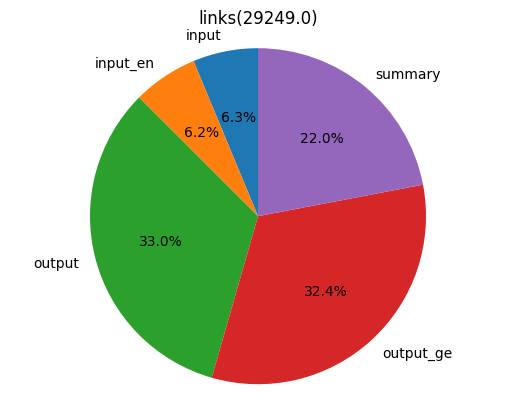

In [45]:
# Create a list of labels for the pie chart
links = stat_dict(keys=keys, name="url_count")
values_links = list(links.values())
links_title = f"links({sum(links.values())})" 
labels = list(links.keys())
# Create the pie chart for dict2 in the second subplot
plt.pie(values_links, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(links_title)
plt.show()